<a href="https://colab.research.google.com/github/HuyKhoi-code/intro-to-semantic-segment/blob/main/FCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khoivohuy","key":"02df61ffe25a9966bf3dcafeb89f10a6"}'}

In [3]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 65 Nov  6 04:44 kaggle.json


In [4]:
# dowload dataset from kaggle
!kaggle datasets download -d xiaose/cityscapes

100% 7.92G/7.92G [02:00<00:00, 43.2MB/s]
100% 7.92G/7.92G [02:01<00:00, 70.3MB/s]


In [5]:
!unzip cityscapes.zip

Streaming output truncated to the last 5000 lines.
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_color.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_instanceIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_instanceTrainIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_labelIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_labelTrainIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_polygons.json  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_color.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_instanceIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_instanceTrainIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_labelIds.png  
  inflating: City

## GET THE DATA AND REVIEW

In [23]:
train_dir = '/content/Cityspaces/gtFine/train/'
dir = os.listdir('/content/Cityspaces/gtFine/train')
print (dir)
paths = []
for path in dir:
    print (path)
    #print (train_dir + path +'/'+ path +'*'+'gtFine_labelIds.png')
    label_path = glob.glob(train_dir + path +'/'+ path +'*'+'gtFine_labelIds.png')
    print (label_path)

['zurich', 'tubingen', 'darmstadt', 'aachen', 'weimar', 'ulm', 'stuttgart', 'hanover', 'cologne', 'dusseldorf', 'bremen', 'krefeld', 'strasbourg', 'erfurt', 'monchengladbach', 'hamburg', 'jena', 'bochum']
zurich
['/content/Cityspaces/gtFine/train/zurich/zurich_000066_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/zurich/zurich_000004_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/zurich/zurich_000110_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/zurich/zurich_000081_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/zurich/zurich_000050_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/zurich/zurich_000027_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/zurich/zurich_000053_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/zurich/zurich_000036_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/zurich/zurich_000116_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/tra

in this model, only use img from aachen folder

In [24]:
# get the label data
label_path = glob.glob('/content/Cityspaces/gtFine/train/aachen/aachen_000'+'*'+'_000019_gtFine_labelIds.png')
label_path.sort()
print (label_path)

['/content/Cityspaces/gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000001_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000002_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000003_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000004_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000005_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000006_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000007_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000008_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000009_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000010_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000011_000019_gtFine_labelI

In [25]:
# original img data
img_path = glob.glob('/content/Cityspaces/images/train/aachen/aachen_000'+'*'+'_000019_leftImg8bit.png')
img_path.sort()
print (img_path)

['/content/Cityspaces/images/train/aachen/aachen_000000_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000001_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000002_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000003_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000004_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000005_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000006_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000007_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000008_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000009_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000010_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000011_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aache

In [104]:
print (img_path[130])

/content/Cityspaces/images/train/aachen/aachen_000130_000019_leftImg8bit.png


In [26]:
label_path = np.array(label_path)
img_path = np.array (img_path)
label = label_path[2]
seg = cv2.imread (label)
seg = cv2.resize (seg,(224,224))
mi, ma = np.min(seg), np.max(seg)
n_classes = ma - mi + 1
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi,ma, n_classes))

img = img_path[2]
img = cv2.imread(img)
img = cv2.resize(img, (224,224))

minimum seg = 1, maximum seg = 33, Total number of segmentation classes = 33


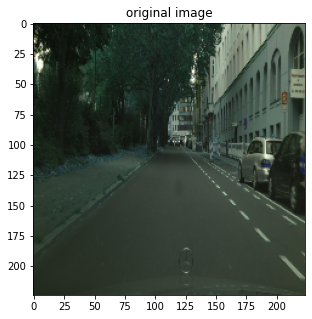

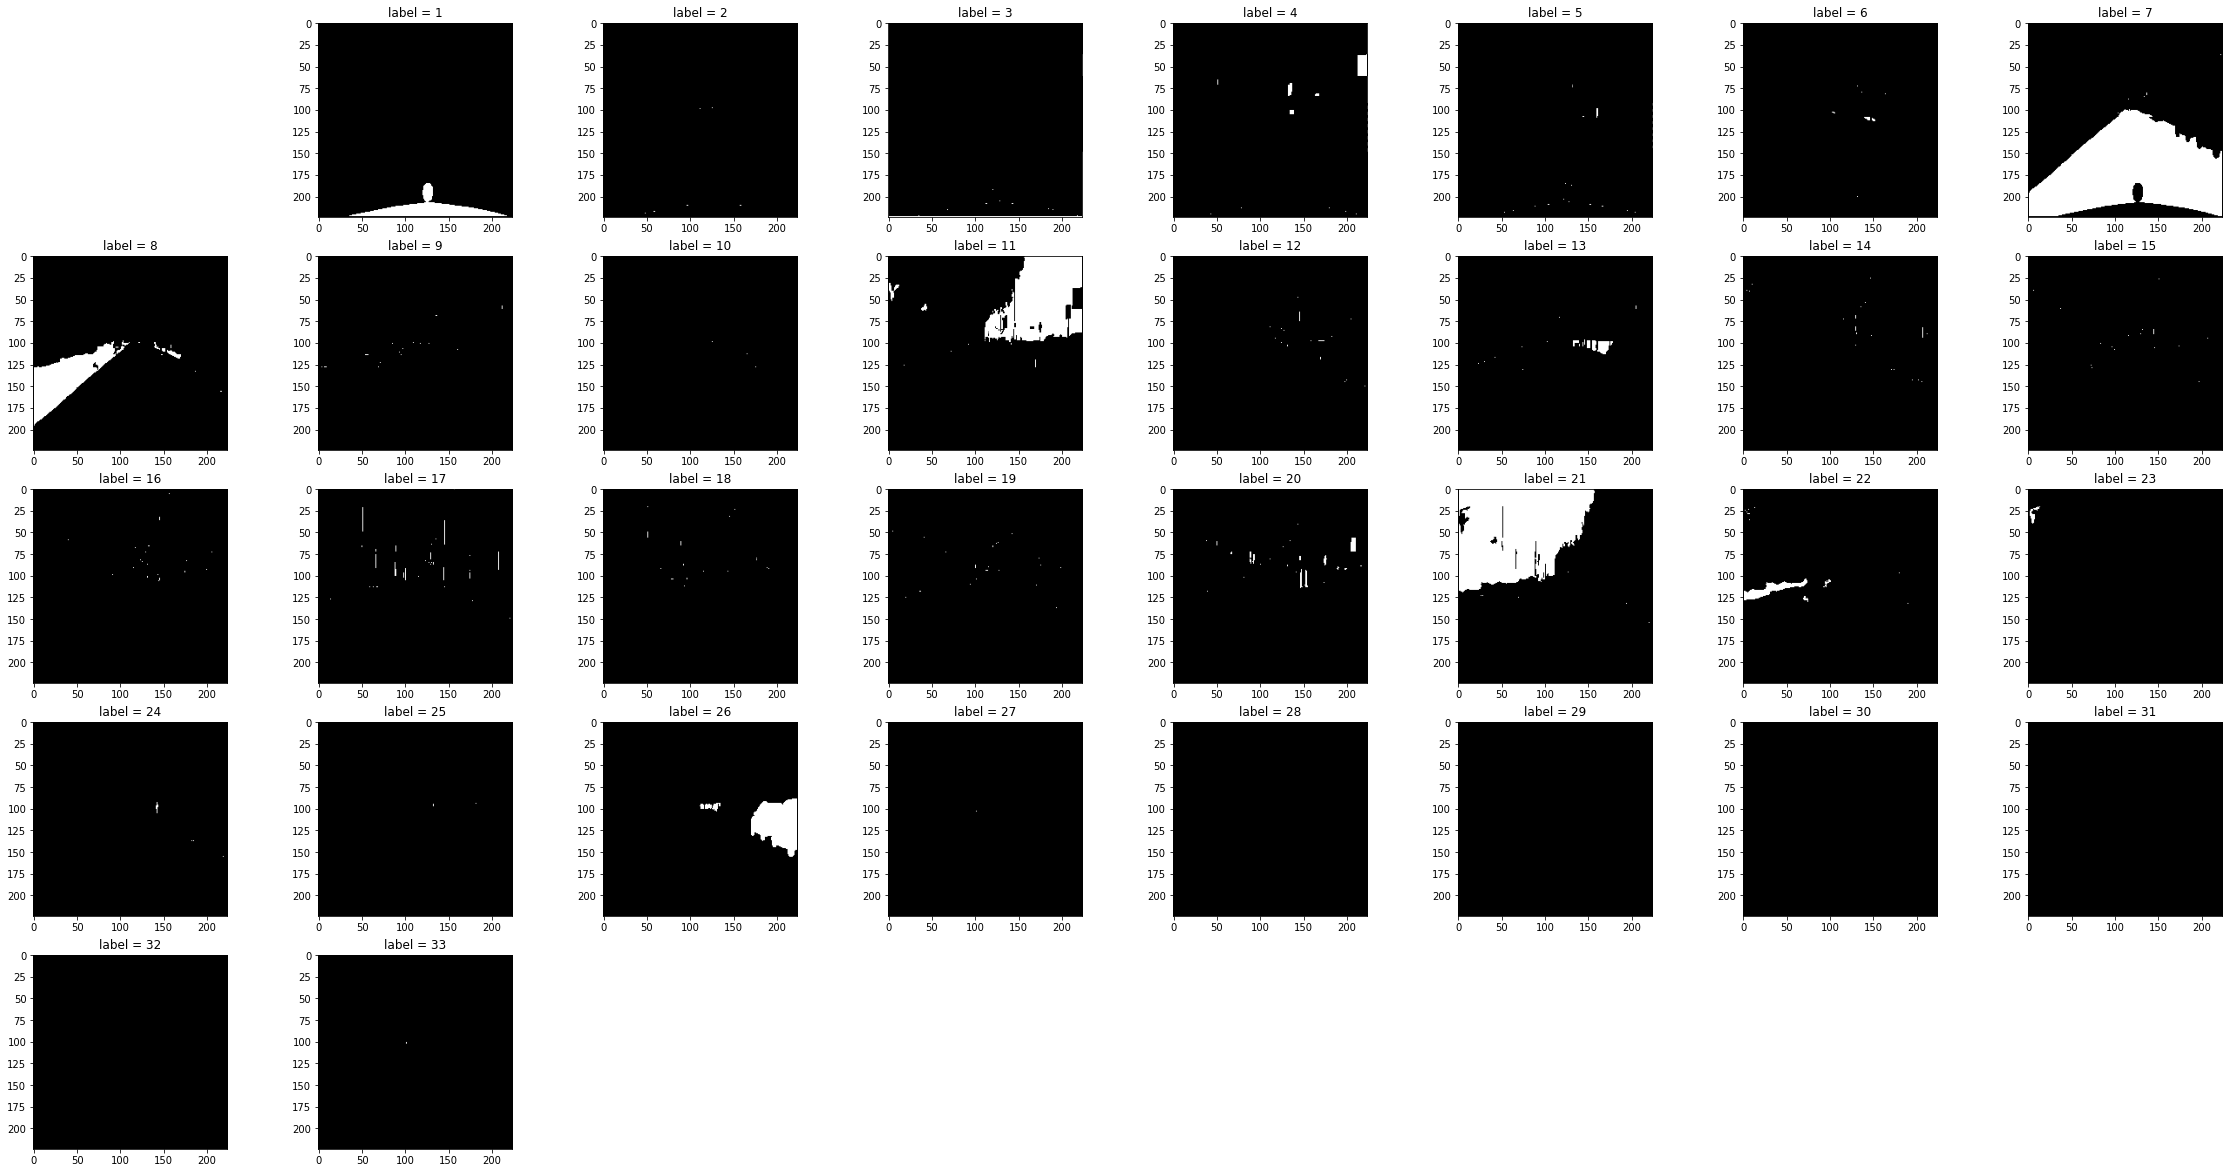

In [27]:
# review img and all the labels of the dataset
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.set_title("original image")
plt.show()

fig = plt.figure(figsize=(40,25))
for k in range(mi,ma+1):
    ax = fig.add_subplot(6, n_classes/4, k+1)
    ax.imshow((seg == k)*1.0)
    ax.set_title("label = {}".format(k))


plt.show()

## PREPROCESSING IMG 

In [108]:
# for vgg basenet, resize all the input img to 224,224 
input_height , input_width = 224 , 224
output_height , output_width = 224 , 224

def getImageArr( path , width , height ):
        img = cv2.imread(path)
        img = np.float32(cv2.resize(img, ( width , height ))) / 255
        return img

def getSegmentationArr( path , nClasses ,  width , height  ):

    seg_labels = np.zeros((  height , width  , nClasses ))
    img = cv2.imread(path)
    img = cv2.resize(img, ( width , height ))
    img = img[:, : , 0]

    for c in range(nClasses):
        seg_labels[: , : , c ] = (img == c ).astype(int)
    return seg_labels

X = []
Y = []
for im , seg in zip (img_path, label_path) :
    X.append( getImageArr (im , input_width , input_height )  )
    Y.append( getSegmentationArr (seg , n_classes , output_width , output_height )  )

X, Y = np.array(X) , np.array(Y)
print(X.shape,Y.shape)

(174, 224, 224, 3) (174, 224, 224, 33)


## INITIALIZE THE MODEL  

In [29]:
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras import optimizers

review the vgg pretrained model 

In [30]:
# Load pretrain model
pretrain_net = VGG16(include_top=False, weights="imagenet")
i = 0
# print all layers from the model 
for layer in pretrain_net.layers:
  print('{} layer {}: {}'.format(i, layer.output.name, layer.output.shape))
  i+=1
print('pretrain_net output: ', pretrain_net.output)


58892288/58889256 [==============================] - 0s 0us/step
0 layer input_1:0: (None, None, None, 3)
1 layer block1_conv1/Relu:0: (None, None, None, 64)
2 layer block1_conv2/Relu:0: (None, None, None, 64)
3 layer block1_pool/MaxPool:0: (None, None, None, 64)
4 layer block2_conv1/Relu:0: (None, None, None, 128)
5 layer block2_conv2/Relu:0: (None, None, None, 128)
6 layer block2_pool/MaxPool:0: (None, None, None, 128)
7 layer block3_conv1/Relu:0: (None, None, None, 256)
8 layer block3_conv2/Relu:0: (None, None, None, 256)
9 layer block3_conv3/Relu:0: (None, None, None, 256)
10 layer block3_pool/MaxPool:0: (None, None, None, 256)
11 layer block4_conv1/Relu:0: (None, None, None, 512)
12 layer block4_conv2/Relu:0: (None, None, None, 512)
13 layer block4_conv3/Relu:0: (None, None, None, 512)
14 layer block4_pool/MaxPool:0: (None, None, None, 512)
15 layer block5_conv1/Relu:0: (None, None, None, 512)
16 layer block5_conv2/Relu:0: (None, None, None, 512)
17 layer block5_conv3/Relu:0: (Non

3 layers for skip connect

In [32]:
pool3 = pretrain_net.layers[10]
pool4 = pretrain_net.layers[14]
pool5 = pretrain_net.layers[18]
print (pool3.output, pool4.output, pool5.output)

Tensor("block3_pool/MaxPool:0", shape=(None, None, None, 256), dtype=float32) Tensor("block4_pool/MaxPool:0", shape=(None, None, None, 512), dtype=float32) Tensor("block5_pool/MaxPool:0", shape=(None, None, None, 512), dtype=float32)


In [33]:
!wget https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-11-06 05:10:38--  https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889256 (56M) [application/octet-stream]
Saving to: ‘vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5.1’

vgg16_weights_tf_di 100%[===================>]  56.16M   200MB/s    in 0.3s    

2020-11-06 05:10:38 (200 MB/s) - ‘vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5.1’ saved [58889256/58889256]



In [40]:
VGG_Weights_path = "/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5.1"

In [41]:
def FCN8(nClasses, input_height=224, input_width=224):
    assert input_height%32 == 0
    assert input_width%32 == 0
    IMAGE_ORDERING =  "channels_last" 

    img_input = Input(shape=(input_height,input_width, 3))
    """vgg = VGG16(include_top=False, weights="imagenet")

    pool3 = vgg.layers[10]
    pool4 = vgg.layers[14]
    pool5 = vgg.layers[18]
    vgg_model = Model(img_input, pool5)"""

    ## Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
    f1 = x
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool', data_format=IMAGE_ORDERING )(x)
    pool3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', data_format=IMAGE_ORDERING )(x)
    pool4 = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool', data_format=IMAGE_ORDERING )(x)## (None, 14, 14, 512) 

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', data_format=IMAGE_ORDERING )(pool4)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', data_format=IMAGE_ORDERING )(x)
    pool5 = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool', data_format=IMAGE_ORDERING )(x)## (None, 7, 7, 512)
    
    vgg  = Model(  img_input , pool5  )
    vgg.load_weights(VGG_Weights_path)
    
    n = 4096
    o = ( Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(pool5)
    conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
    
    
    ## 4 times upsamping for pool4 layer
    conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)
    ## (None, 224, 224, 10)
    ## 2 times upsampling for pool411
    pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4)
    pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)
    
    pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3)
        
    o = Add(name="add")([pool411_2, pool311, conv7_4 ])
    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
    o = (Activation('softmax'))(o)
    
    model = Model(img_input, o)

    return model

In [42]:
model  = FCN8(nClasses=   n_classes,  
             input_height = 224, 
             input_width  = 224)
model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
_______________________________________________________________________________________

## SPLIT TRAIN AND VALUATE DATA

In [43]:
from sklearn.utils import shuffle

train_rate = 0.8
index_train = np.random.choice(X.shape[0],int(X.shape[0]*train_rate),replace=False)
index_test  = list(set(range(X.shape[0])) - set(index_train))
                            
X, Y = shuffle(X,Y)
# split train and test data 
X_train, y_train = X[index_train],Y[index_train]
X_test, y_test = X[index_test],Y[index_test]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(139, 224, 224, 3) (139, 224, 224, 33)
(35, 224, 224, 3) (35, 224, 224, 33)


## TRAIN AND OPTIMIZE

In [44]:
# use sgd for optimizing model 
sgd = optimizers.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
# fit train data to model 
hist1 = model.fit(X_train,y_train,
                  validation_data=(X_test,y_test),
                  batch_size=16,epochs=60,verbose=2)

Epoch 1/60
9/9 - 387s - loss: 3.5318 - accuracy: 0.0433 - val_loss: 3.4437 - val_accuracy: 0.0615
Epoch 2/60
9/9 - 384s - loss: 3.1867 - accuracy: 0.1507 - val_loss: 2.6249 - val_accuracy: 0.3189
Epoch 3/60
9/9 - 388s - loss: 2.4847 - accuracy: 0.3324 - val_loss: 2.2451 - val_accuracy: 0.3455
Epoch 4/60
9/9 - 387s - loss: 2.0778 - accuracy: 0.4248 - val_loss: 2.0543 - val_accuracy: 0.4798
Epoch 5/60
9/9 - 397s - loss: 1.8455 - accuracy: 0.5138 - val_loss: 1.9098 - val_accuracy: 0.4934
Epoch 6/60
9/9 - 388s - loss: 1.7200 - accuracy: 0.5245 - val_loss: 1.7727 - val_accuracy: 0.5038
Epoch 7/60
9/9 - 386s - loss: 1.6441 - accuracy: 0.5408 - val_loss: 1.6536 - val_accuracy: 0.5301
Epoch 8/60
9/9 - 388s - loss: 1.6227 - accuracy: 0.5433 - val_loss: 1.7423 - val_accuracy: 0.5401
Epoch 9/60
9/9 - 395s - loss: 1.5845 - accuracy: 0.5560 - val_loss: 1.5850 - val_accuracy: 0.5561
Epoch 10/60
9/9 - 385s - loss: 1.4744 - accuracy: 0.5875 - val_loss: 1.4912 - val_accuracy: 0.5895
Epoch 11/60
9/9 - 3

save model 

In [45]:
# save model for later use 
model.save('/content/model.h5')

## SHOW THE RESULT

plot for loss function

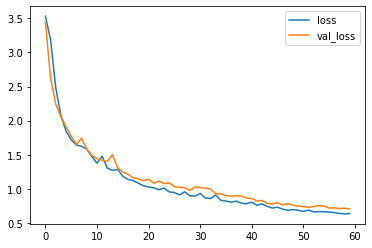

In [46]:
for key in ['loss', 'val_loss']:
    plt.plot(hist1.history[key],label=key)
plt.legend()
plt.show()

In [57]:
y_pred = model.predict(X_test)
# reshape the predict result and test 
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_testi.shape,y_predi.shape)

(35, 224, 224) (35, 224, 224)


show and compare the original img, predict seg and true seg

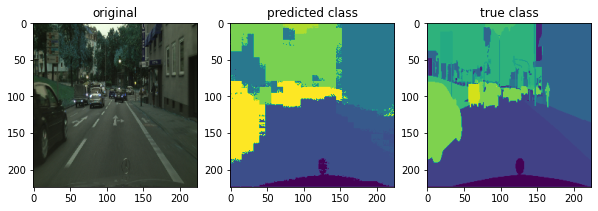

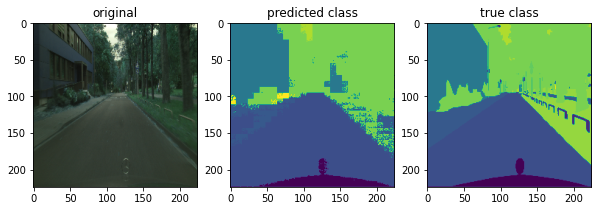

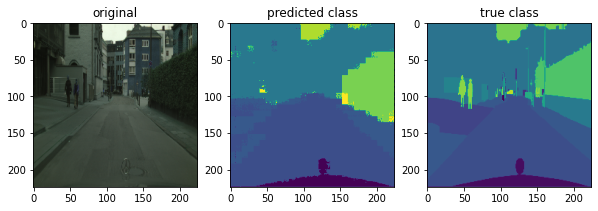

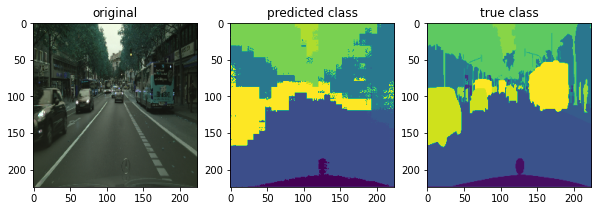

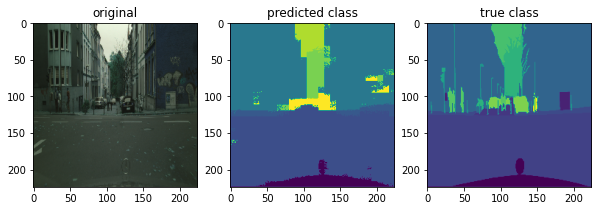

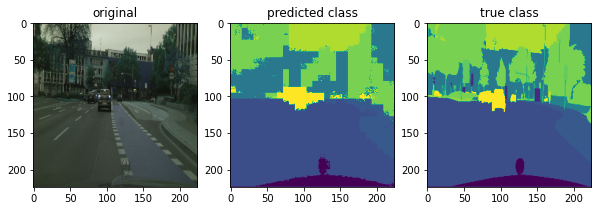

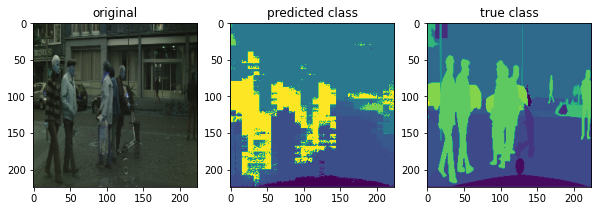

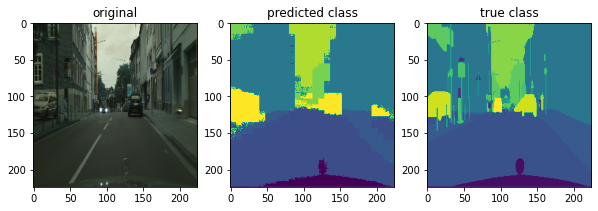

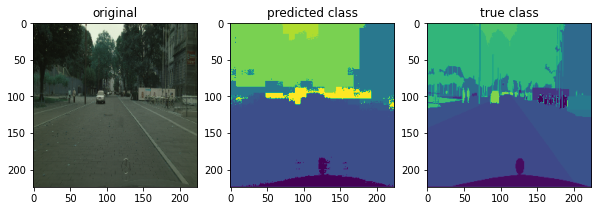

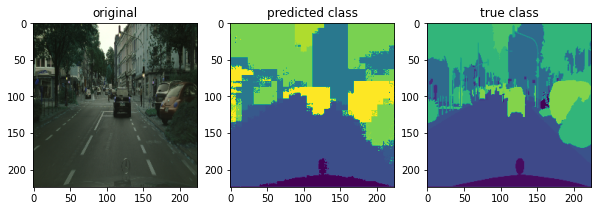

In [112]:
shape = (224,224)
n_classes= n_classes

for i in range(10):
    img_is  = X_test[i]
    seg = y_predi[i]
    true = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    #ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.imshow(seg)
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    #ax.imshow(give_color_to_seg_img(true,n_classes))
    ax.imshow(true)
    ax.set_title("true class")
    plt.show()